# Computational Problem #2 -- Solar Flux, Luminosity, & Apparent Magnitude

In this computational problem, you will practice skills and commands that you learned in Computational Problem #1, and learn new commands and skills as well.

Specifically, this notebook will help you:
   * practice importing packages, defining functions, and reading & displaying data;
   * use the numpy.logical_and  (http://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) and numpy.where (http://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) commands to select a subset of a dataset for further operations;
   * use the numpy.trapz (http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html) command to numerically integrate a spectrum;
   * use the numpy.interp (http://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html) command to interpolate one set of x & y datapoints onto another set of x datapoints.
   * perform mathematical operations on arrays and numbers;

Read through the rest of this notebook, completing tasks that are highlighted in **bold text**.  As always, it may be helpful to consult additional documentation on how to write and run iPython notebooks (http://ipython.org/ipython-doc/stable/notebook/index.html), and the matplotlib (http://matplotlib.org) and numpy (http://docs.scipy.org/doc/numpy/user/) packages.

** Add a new cell below, and import the same packages that we used in Computational Notebook 1. ** <br>
(typing in the commands or copying them directly from Problem 1 should both work) 

** In a new cell below, insert the code that you used in Computational Problem 1 to read in the Solar Spectrum. **

If all of the steps above have been completed, and solar spectrum was read into arrays called 'SolarWavelength' and 'SolarFlux', the cell below should create a plot of the solar spectrum. Does this work?

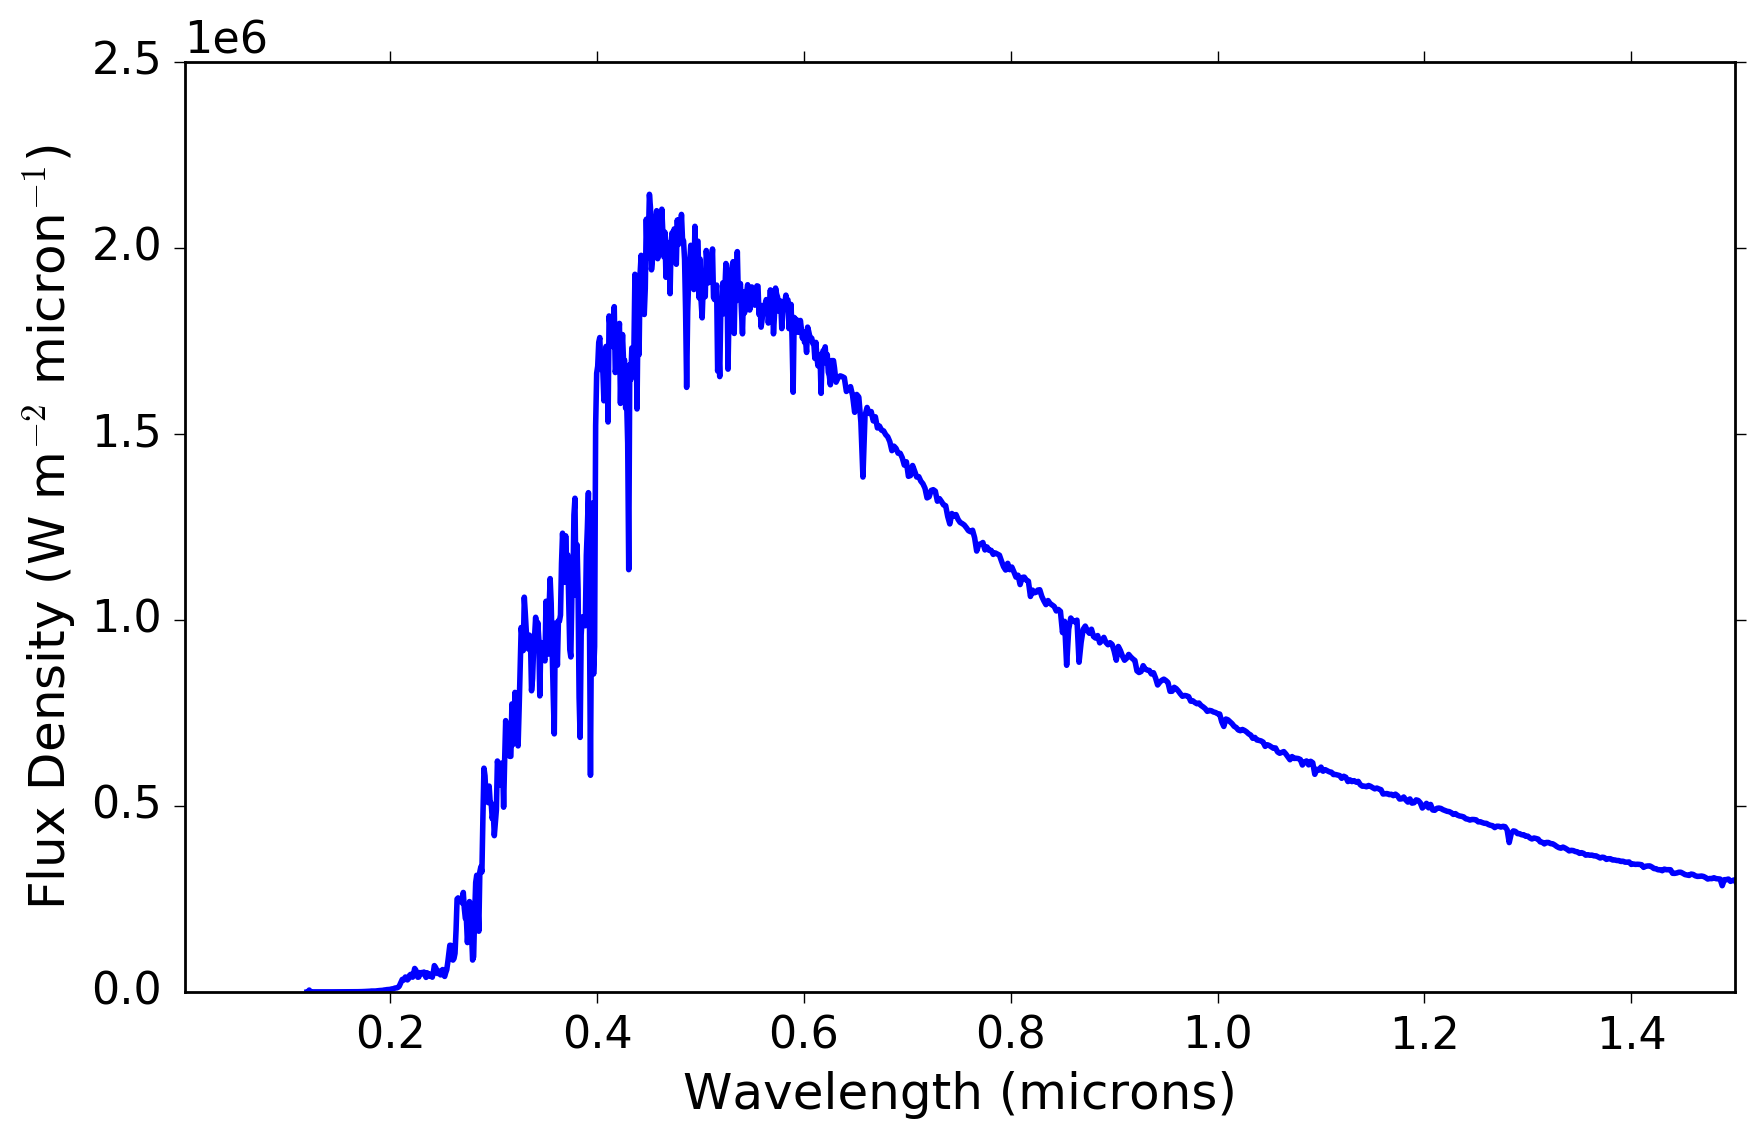

In [8]:
#Plot the solar spectrum 
plt.plot(SolarWavelength,SolarFlux,linewidth = 2)

plt.axis([1E-3,1.5,1E-2,2.5E6])
xlabel = plt.xlabel('Wavelength (microns)') 
ylabel = plt.ylabel('Flux Density (W m$^{-2}$ micron$^{-1}$)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

Let's make the same plot again, but this time let's add one more feature: let's use the numpy 'where' and 'logical_and' commands to select the portion of the solar spectrum between 0.4 and 0.7 microns, and highlight that portion of the spectrum in red.

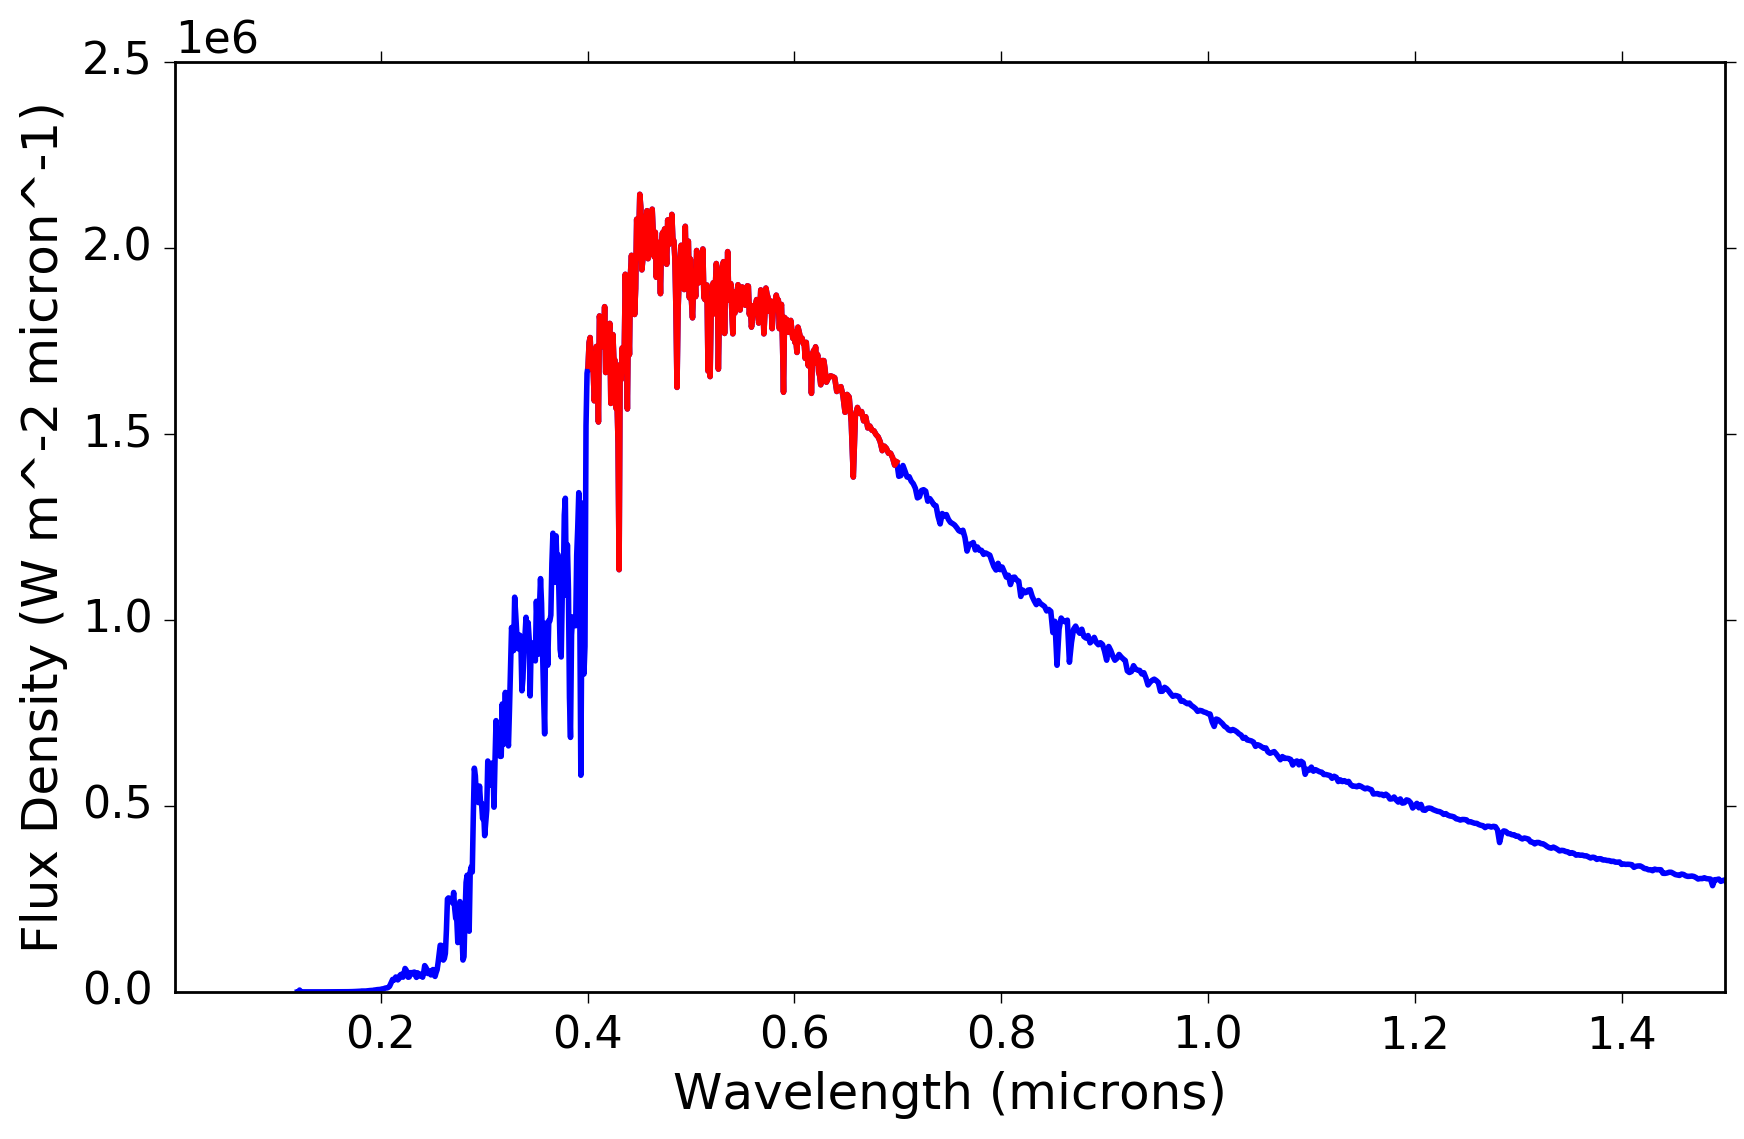

In [15]:
#Plot the solar spectrum 
plt.plot(SolarWavelength,SolarFlux,linewidth = 2)

#identify the subset of the solar spectrum that covers the wavelength range from 0.4 to 0.7 microns
visual_elements = np.where(np.logical_and(SolarWavelength > 0.4, SolarWavelength < 0.7))
plt.plot(SolarWavelength[visual_elements],SolarFlux[visual_elements],linewidth = 2, color = 'r')

plt.axis([1E-3,1.5,1E-2,2.5E6])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
xlabel = plt.xlabel('Wavelength (microns)') 
ylabel = plt.ylabel('Flux Density (W m^-2 micron^-1)')

Now let's try another cool trick: let's use the numpy.trapz command to numerically integrate the spectrum over its full range, and then just between 0.4 and 0.7 microns, to find what fraction of the Sun's energy comes out at optical wavelengths. 

In [17]:
#use trapezoidal integration to integrate the solar spectrum
solar_constant = np.trapz(SolarFlux, SolarWavelength)
visual_flux = np.trapz(SolarFlux[visual_elements],SolarWavelength[visual_elements])

print(solar_constant, visual_flux, visual_flux / solar_constant)

1366090.79684 527860.5 0.386402207834


Interesting! It looks like just over a third of the Sun's light comes out at wavelengths our eyes can detect.

The process you've just completed -- analyzing the amount of energy that a star emits over a certain wavelength range -- is one of the fundamental tools that astronomers have for measuring a star's brightness.  Sometimes we do this with a spectrum, as we've done here; other times we do this physically, by putting a filter on our telescope and measuring how bright the star appears in the resulting picture.  

Let's start by reading in and plotting the properties of a common set of astronomical filters.  The files we'll read in have two columns: wavelength (in microns) and transmission percentage, a number that indicates what fraction of the photons the filter will let pass at each wavelength.  (To run the next cell, make sure you've downloaded the files with names like 'bessell_V.dat' from canvas and placed them in the same directory as this notebook file.)

The letters toward the end of each file name are the names that astronomers have come up to describe the wavelength range of each filter: U for ultraviolet, B for blue, V for visual, R for red, and I for infrared.  Do those names make sense based on the figure below?  This figure should look very similar to Figure 6.3 in our notes: does it?

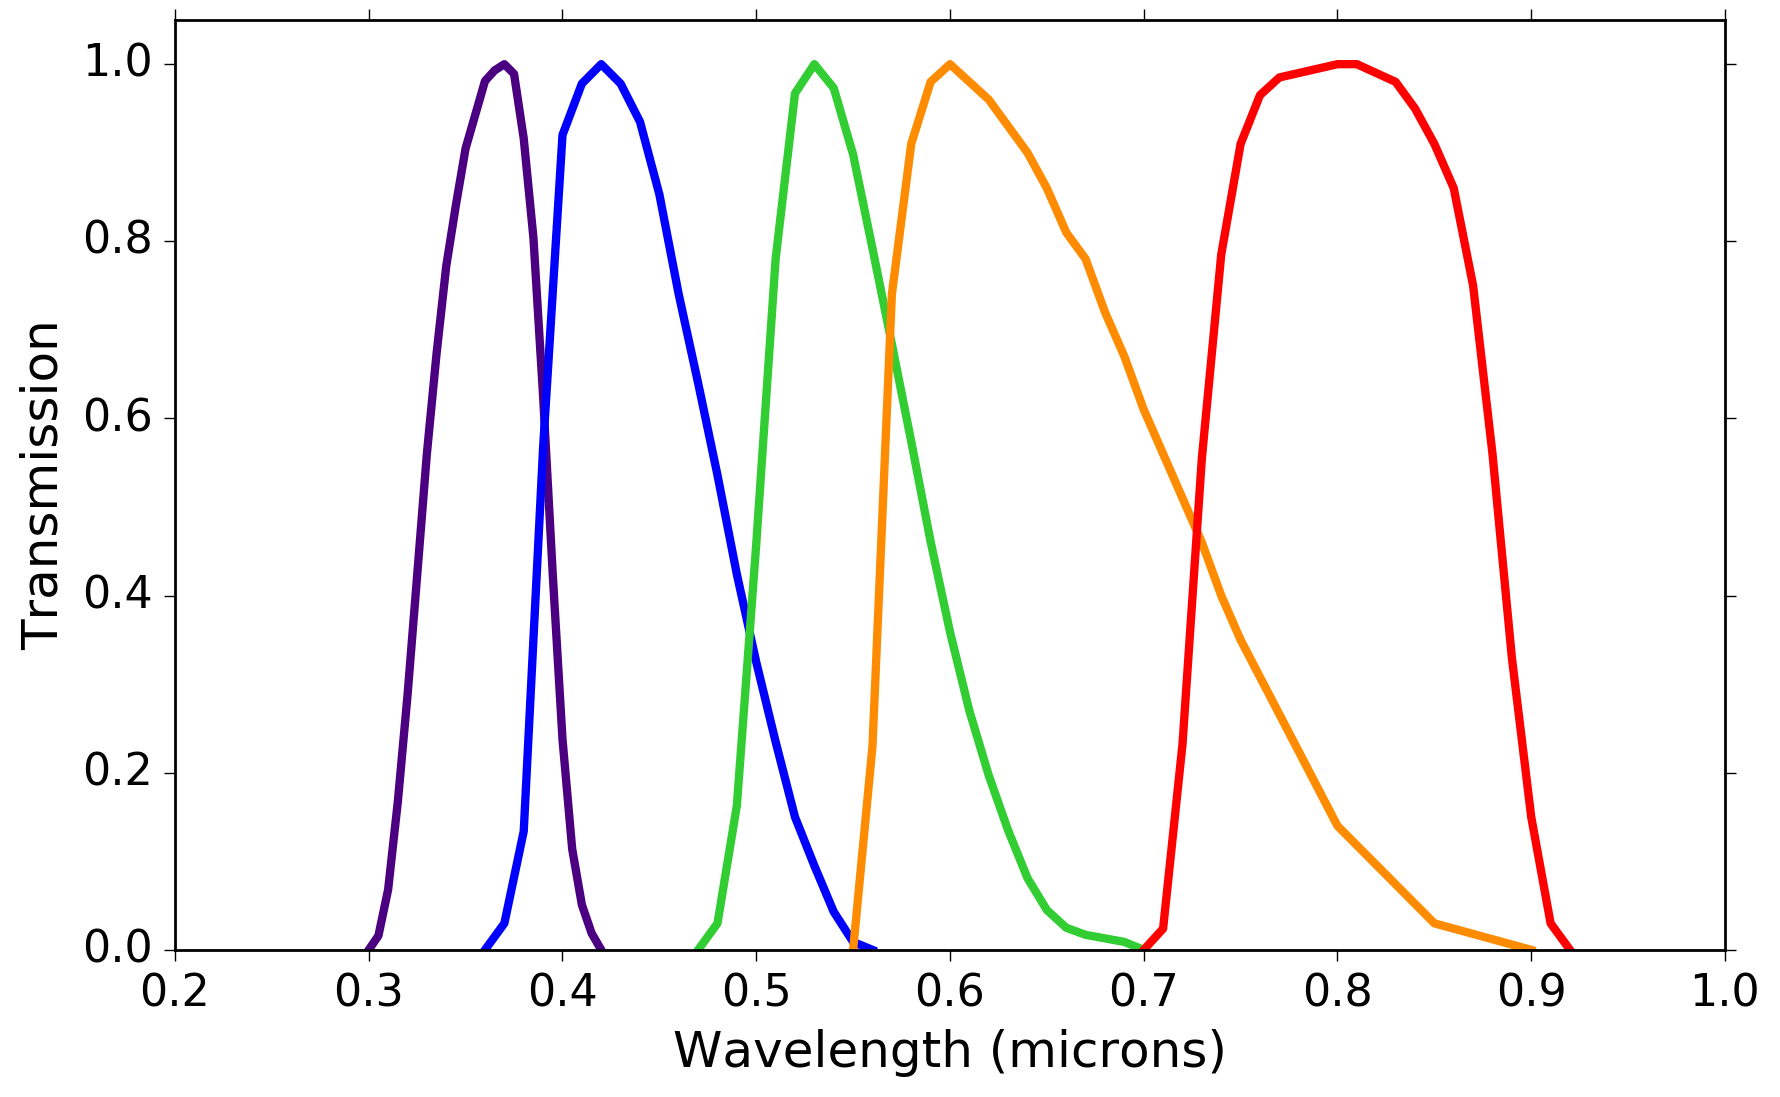

In [18]:
U_filter = np.genfromtxt('bessell_U.dat', delimiter=',', usecols=range(2), filling_values = 0.0)
plt.plot(U_filter[:,0], U_filter[:,1], linewidth = 3, color = 'Indigo')
B_filter = np.genfromtxt('bessell_B.dat', delimiter=',', usecols=range(2), filling_values = 0.0)
plt.plot(B_filter[:,0], B_filter[:,1], linewidth = 3, color = 'Blue')
V_filter = np.genfromtxt('bessell_V.dat', delimiter=',', usecols=range(2), filling_values = 0.0)
plt.plot(V_filter[:,0], V_filter[:,1], linewidth = 3, color = 'LimeGreen')
R_filter = np.genfromtxt('bessell_R.dat', delimiter=',', usecols=range(2), filling_values = 0.0)
plt.plot(R_filter[:,0], R_filter[:,1], linewidth = 3, color = 'DarkOrange')
I_filter = np.genfromtxt('bessell_I.dat', delimiter=',', usecols=range(2), filling_values = 0.0)
plt.plot(I_filter[:,0], I_filter[:,1], linewidth = 3, color = 'Red')
plt.axis([0.2,1.0,0,1.05])
xlabel = plt.xlabel('Wavelength (microns)') 
ylabel = plt.ylabel('Transmission')

Let's simulate what would happen if we took a measurement of the Sun's brightness through one of these filters.  To do this, we'll need to:

1. Use the numpy.interp command to interpolate the filter's transmission curve datapoints onto the exact wavelengths in our Solar Spectrum;
2. Multiply the flux values in the solar spectrum by these interpolated transmission values, to calculate what fraction of the Sun's photons at each wavelength would actually make it through the filter;
3. use the numpy.trapz command to numerically integrate the product of the solar spectrum and the filter curve, to calculate the total flux that would make it through the filter and be detected the instrument on our telescope.

These three steps are performed in the next three cells:

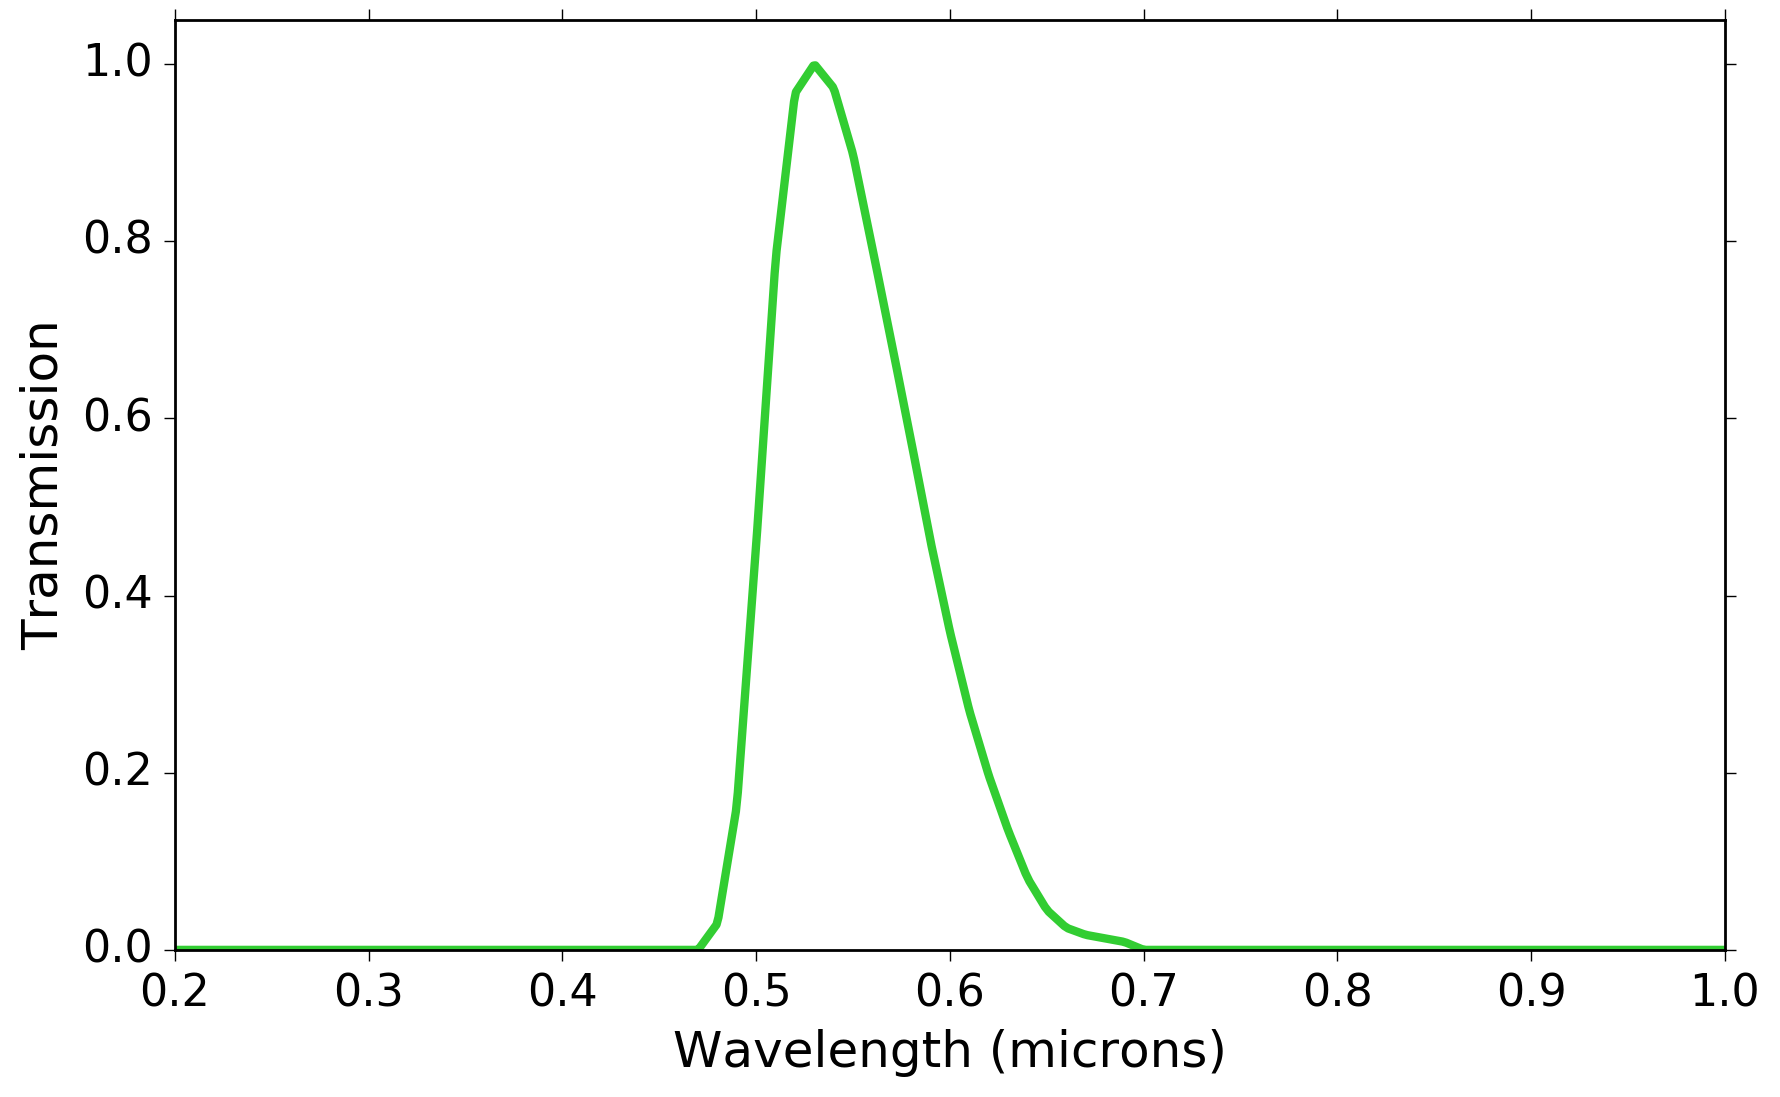

In [19]:
#Interpolate the V band filter onto the Solar Spectrum's wavelength grid
V_interp = np.interp(SolarWavelength, V_filter[:,0], V_filter[:,1]) 

#Plot the V band filter on the Solar Spectrum's wavelength grid 
#to make sure it looks the same as above
plt.plot(SolarWavelength, V_interp, linewidth = 3, color = 'LimeGreen')
plt.axis([0.2,1.0,0,1.05])
xlabel = plt.xlabel('Wavelength (microns)') 
ylabel = plt.ylabel('Transmission')

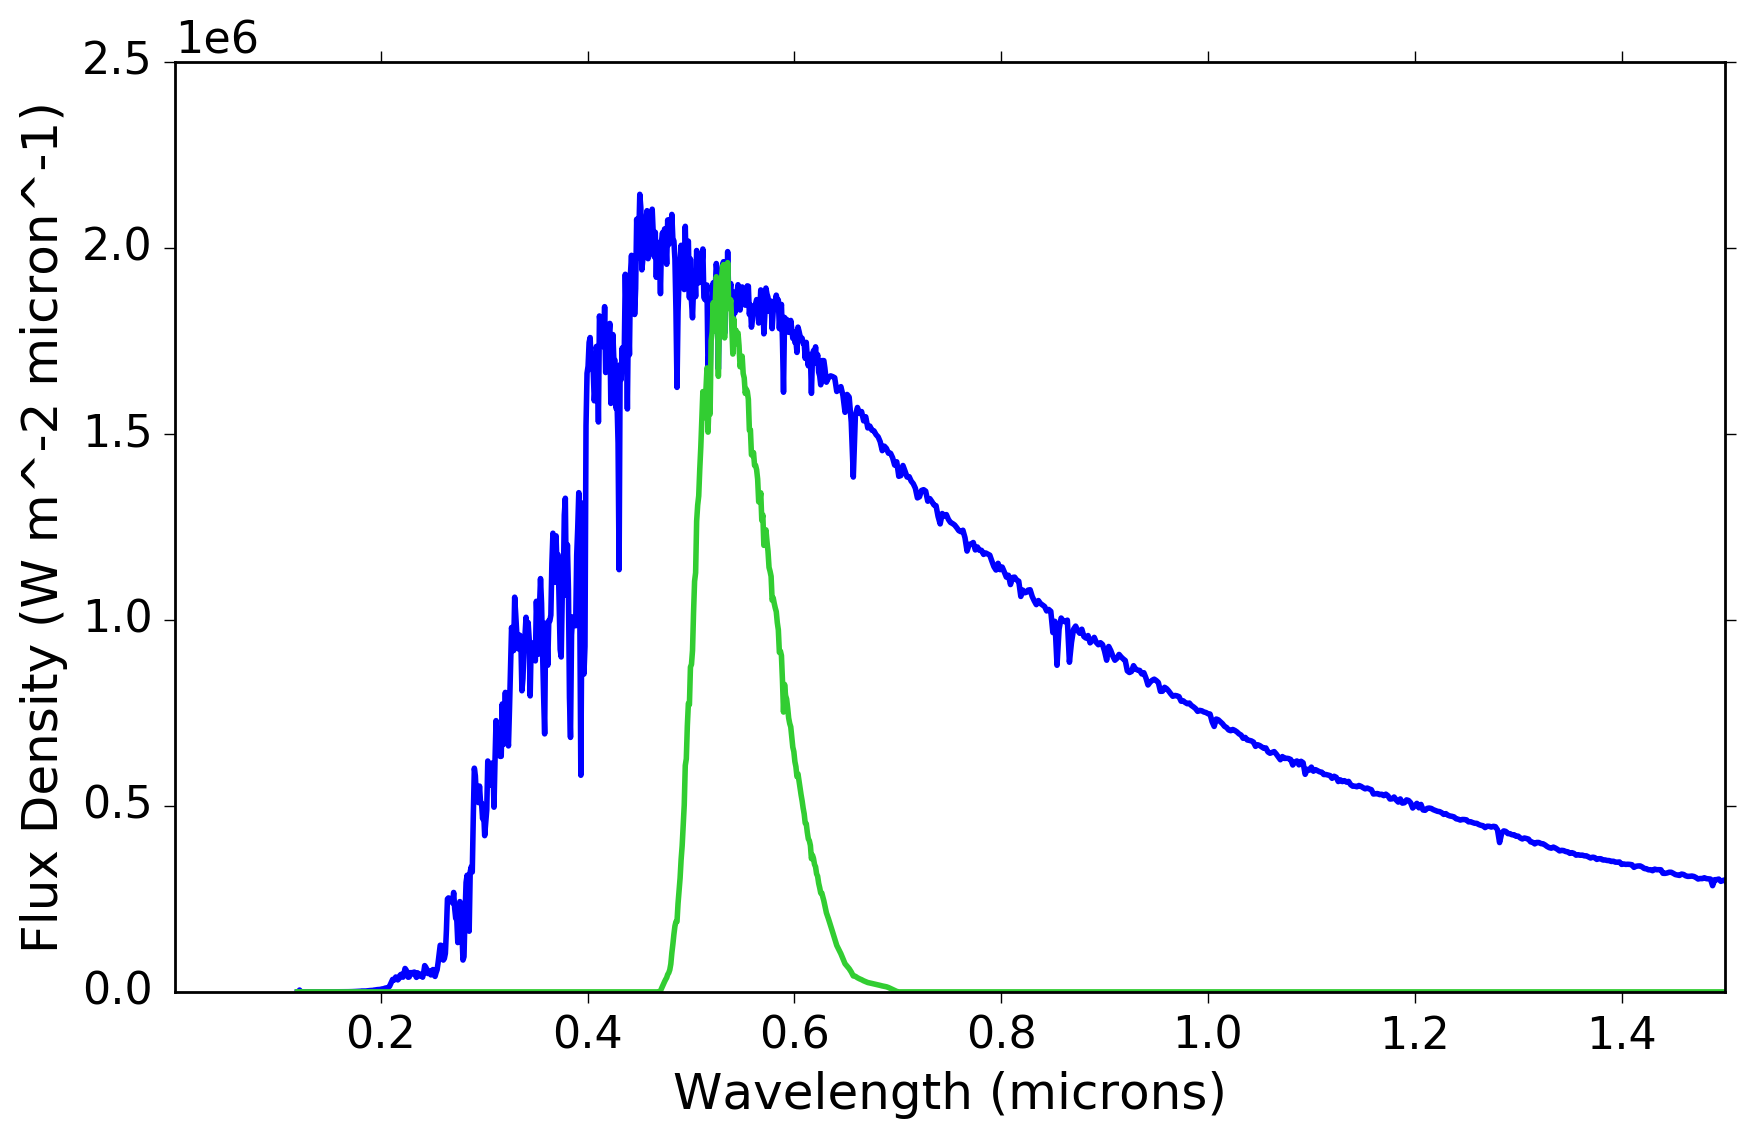

In [21]:
#Plot the solar spectrum, along with the product of the spectrum and the V band filter 
plt.plot(SolarWavelength,SolarFlux,linewidth = 2)
plt.plot(SolarWavelength,SolarFlux*V_interp,linewidth = 2, color = 'LimeGreen')
plt.axis([1E-3,1.5,1E-2,2.5E6])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
xlabel = plt.xlabel('Wavelength (microns)') 
ylabel = plt.ylabel('Flux Density (W m^-2 micron^-1)')

In [23]:
#integrate the flux from the solar spectrum that makes it through the V band filter
V_flux = np.trapz(SolarFlux*V_interp, SolarWavelength)
print(V_flux)

164365.452675


** What are the units of the integrated flux value that is printed above? **

Ok -- at this point you've seen how to read in a spectrum and a filter curve, and use that data to calculate the total integrated flux that would be detected through that filter. 

The last steps of this notebook are to repeat this process for a spectrum of Vega. By reading in the Vega's spectrum, and calculating its integrated flux through the same V filter, you will have all the information you need to calculate the Sun's apparent V magnitude.

** To break this down into specific steps, add cells below to: **

** 1. Repeat the process above using the transmission curve for the I-band filter to compute the Sun's integrated I band flux. **

** 2. Read in and make a plot of the spectrum of Vega stored in the file 'VegaSpectrum.tbl'.  Make the plot cover the wavelength range from 0.1 to 1.2 microns. **

** 3. Interpolate the V & I band filters onto the wavelength grid of the Vega spectrum, multiply the Vega spectrum by those filter's interpolated transmission curves, and numerically integrate the flux densities in the product. Print out the resulting numerical values and describe their meaning and units. **

** 4. Use the integrated V and I band flux values for the Sun and Vega to calculate the Sun's apparent V and I magnitudes.  Show your calculation and print the result; how does the numerical value compare with values quoted elsewhere? **

** 5. Finally, repeat the steps above to calculate V and I band magnitudes for the stars you were assigned for computational problem 1. You should be able to check your answer against the magnitudes stored in Simbad: do they show a reasonable level of agreement? (hint: your answers to question 2 on the HW may help you gauge differences in magnitudes) **

** Once you've completed all the steps and answered all the questions above, use the 'make a copy' command in the file menu at the top of this tab to save a new copy of this notebook, entitled 'ASTR316_CompProb2_LastNames' (replacing LastName with your and your partner's last names).  

Once you have saved this copy of your notebook, strip out all the extraneous markdown text -- leave only the actual python code, my questions, and your answers -- then save the copied notebook one last time, and submit it via the dropbox file request link on canvas. 